**Name: Methsarani H.E.N.**

**Index: 200395P**

**Detecting and Analyzing Circles in an Image using Blob Detection**

Largest Circle Radius (r): 42.42640687119285


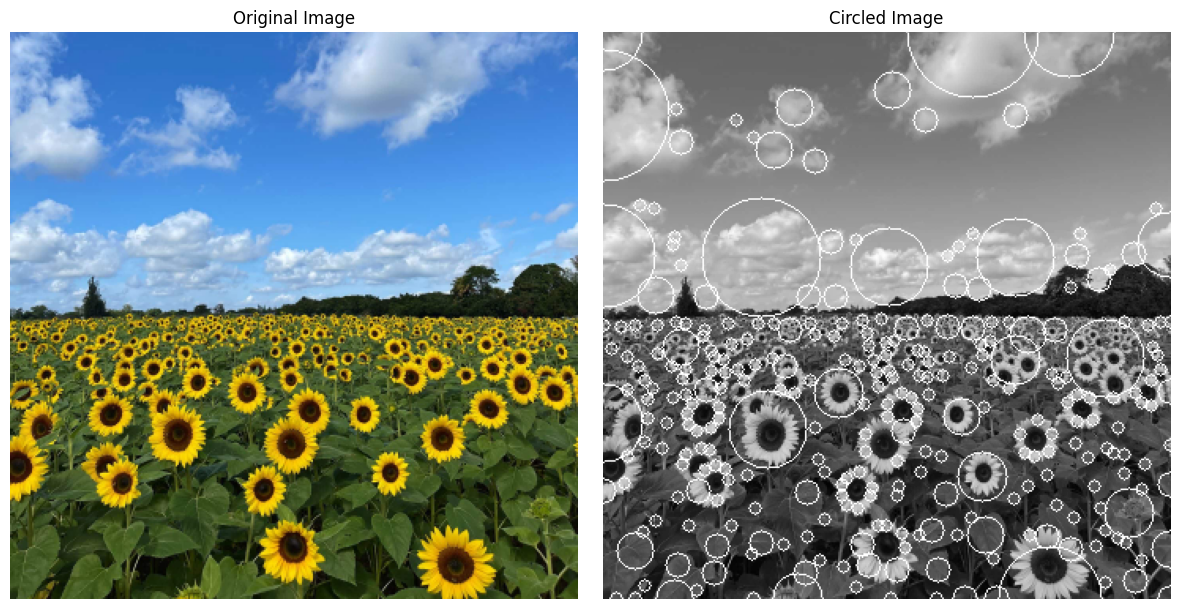

In [155]:
import cv2 as cv
import numpy as np
from skimage.feature import blob_log
from math import sqrt
import matplotlib.pyplot as plt

# Load the input image (make sure the file path is correct)
image = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert the input image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# To reduce noise, apply Gaussian blur 
blurred_image = cv.GaussianBlur(gray_image, (9, 9), 0.5)

# Define parameters for blob detection
sigma_min = 3# Minimum standard deviation (controls the smallest detectable blobs)
sigma_max = 30# Maximum standard deviation (controls the largest detectable blobs)
threshold_val = 0.05# Threshold for blob detection (adjust as needed)

#Laplacian of Gaussians for ditection of blobs 
blobs_detect = blob_log(blurred_image, min_sigma=sigma_min, max_sigma=sigma_max, threshold=threshold_val)
blobs_detect[:, 2] = blobs_detect[:, 2] * sqrt(2)

# Find the index of the blob with the largest radius
max_radius_index = np.argmax(blobs_detect[:, 2])

# Get parameters of the largest detected circle
largest_circle_parameters = blobs_detect[max_radius_index]
largest_radi = largest_circle_parameters[2]

# Print the radius of the largest detected circle
print(f"Largest Circle Radius (r): {largest_radi}")

# Create a copy of the grayscale image to draw circles on
circled_image = gray_image.copy()

# Loop through detected blobs and draw circles on the image
for blob in blobs_detect:
    y, x, r = blob  #Blob format is (y, x, r)
    center = (int(x), int(y))
    radius = int(r)
    cv.circle(circled_image, center, radius, (255, 255, 0), 1)  # Draw circles in white

# Create a matplotlib figure to display original and circled images
plt.figure(figsize=(12, 6))

# Plot the original color image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

# Plot the grayscale image with detected circles
plt.subplot(1, 2, 2)
plt.title("Circled Image")
plt.imshow(circled_image, cmap='gray')
plt.axis('off')

# Display the images with circles
plt.tight_layout()
plt.show()

# Save the plot to an image file (e.g., PNG format)
figure.savefig('1.png', dpi=300, bbox_inches='tight')




**Superimposing a flag onto an architectural image**

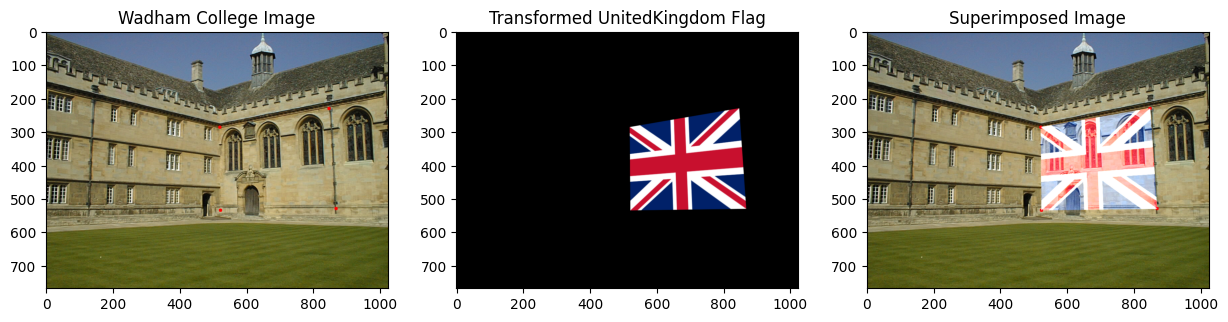

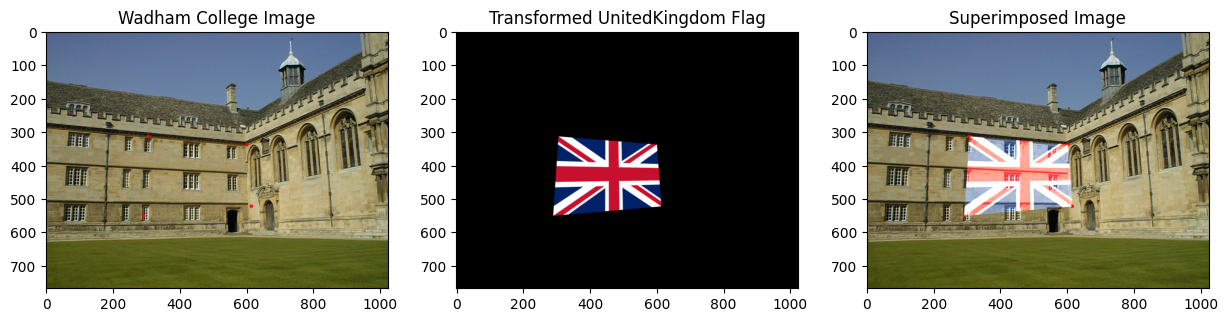

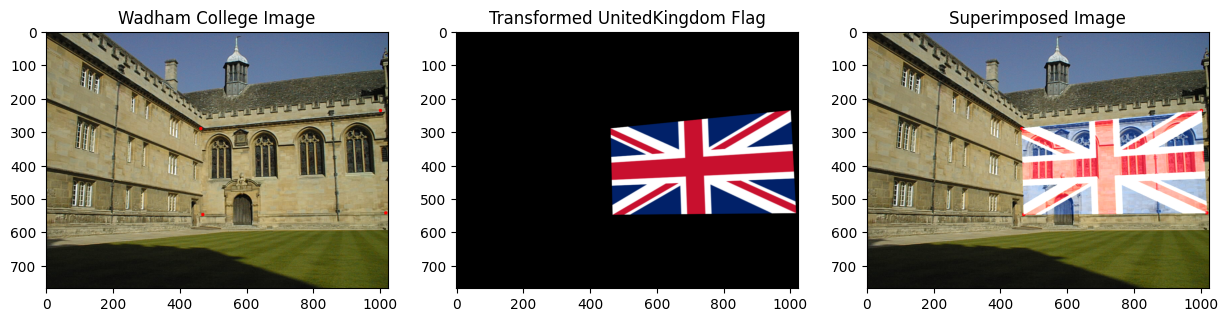

In [44]:
# Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Initialize a list to store selected corners
corners_array = []

# Define a mouse click callback function
def mouse_click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN and len(corners) < 4:
        corners_array.append([x, y])
        # Draw a red dot where the user clicked
        cv.circle(im, (x, y), 5, (0, 0, 255), -1)
        cv.imshow("Wadham College", im)

# List of image filenames to process
images = ["001.jpg", "003.jpg", "005.jpg"]

# Loop through the images
for i in range(3):
    im = cv.imread(images[i])
    cv.imshow("Wadham College", im)
    corners_array = []  # Reset corners for each image
    cv.setMouseCallback("Wadham College", mouse_click)
    
    # Wait for mouse clicks until four points are selected or 'q' is pressed
    while len(corners_array) < 4:
        key = cv.waitKey(1) & 0xFF
        if key == ord("q"):  # Press 'q' to exit without selecting all points
            break
        elif key == 27:  # Press 'Esc' to exit the program
            cv.destroyAllWindows()
            exit(0)
    
    cv.destroyAllWindows()

    # Skip processing if not enough points are selected for the current image
    if len(corners_array) < 4:
        continue

    # Get image dimensions
    height, width = np.shape(im)[0], np.shape(im)[1]
    zero_matrix = np.array([[0], [0], [0]])

    # Extract selected corner coordinates
    x1, y1, x2, y2, x3, y3, x4, y4 = (
        corners_array[0][0],
        corners_array[0][1],
        corners_array[1][0],
        corners_array[1][1],
        corners_array[2][0],
        corners_array[2][1],
        corners_array[3][0],
        corners_array[3][1],
    )

    # Load the flag image
    flag_image = cv.imread("Flag_of_the_United_Kingdom_(1-2).svg.png")
    flag_height, flag_width = np.shape(flag_image)[0], np.shape(flag_image)[1]

    # Define the coordinates of the corners of the flag image
    points_of_flag = np.array([[0, 0, 1], [flag_width - 1, 0, 1], [flag_width - 1, flag_height - 1, 1], [0, flag_height - 1, 1]])

    # Create the matrix A for homography calculation
    matrix = np.concatenate(
        (
            np.concatenate((zero_matrix.T, points_of_flag[0].reshape(1, -1), -y1 * points_of_flag[0].reshape(1, -1)), axis=1),
            np.concatenate((points_of_flag[0].reshape(1, -1), zero_matrix.T, -x1 * points_of_flag[0].reshape(1, -1)), axis=1),
            np.concatenate((zero_matrix.T, points_of_flag[1].reshape(1, -1), -y2 * points_of_flag[1].reshape(1, -1)), axis=1),
            np.concatenate((points_of_flag[1].reshape(1, -1), zero_matrix.T, -x2 * points_of_flag[1].reshape(1, -1)), axis=1),
            np.concatenate((zero_matrix.T, points_of_flag[2].reshape(1, -1), -y3 * points_of_flag[2].reshape(1, -1)), axis=1),
            np.concatenate((points_of_flag[2].reshape(1, -1), zero_matrix.T, -x3 * points_of_flag[2].reshape(1, -1)), axis=1),
            np.concatenate((zero_matrix.T, points_of_flag[3].reshape(1, -1), -y4 * points_of_flag[3].reshape(1, -1)), axis=1),
            np.concatenate((points_of_flag[3].reshape(1, -1), zero_matrix.T, -x4 * points_of_flag[3].reshape(1, -1)), axis=1),
        ),
        axis=0,
        dtype=np.float64,
    )

    # Solve for the homography matrix
    eigenvalues, eigenvectors = np.linalg.eig((matrix.T) @ matrix)
    temph = eigenvectors[:, np.argmin(eigenvalues)]
    H = temph.reshape((3, 3))

    # Warp the flag image to match the perspective of the input image
    transformed_flag = cv.warpPerspective(flag_im, H, (w, h))

    # Superimpose the transformed flag onto the input image
    final_image = cv.add(transformed_flag, im)

    # Display the original image, transformed flag, and superimposed image
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    ax[0].set_title("Wadham College Image")
    ax[1].imshow(cv.cvtColor(transformed_flag, cv.COLOR_BGR2RGB))
    ax[1].set_title("Transformed UnitedKingdom Flag")
    ax[2].imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
    ax[2].set_title("Superimposed Image")
    plt.show()


**SIFT Feature Detection and Matching**

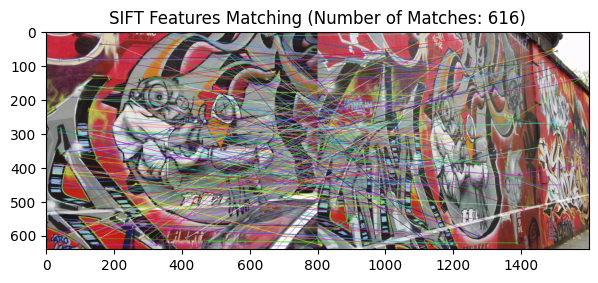

In [45]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load two images to compare (change file paths as needed)
image1 = cv.imread("img1.ppm")
image5 = cv.imread("img5.ppm")

# Create a SIFT (Scale-Invariant Feature Transform) detector
sift_detector = cv.SIFT_create()

# Detect keypoints and compute descriptors for both images
keypoint1, descriptor1 = sift_detector.detectAndCompute(image1, None)
keypoint2, descriptor2 = sift_detector.detectAndCompute(image5, None)

# Create a Brute-Force Matcher with L1 distance for feature matching
Brute_Force_matcher = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

# Match descriptors from the two images
match = sorted(Brute_Force_matcher.match(descriptor1, descriptor2), key=lambda x: x.distance)

# Calculate the number of matching features
num_matches = len(match)

# Draw the first 250 matching features between the two images
matched_image = cv.drawMatches(
    image1, keypoint1, image5, keypoint2, match[:250], image5, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display the image with matching features and the number of matches
fig, ax = plt.subplots(figsize=(7, 7))
matched_image = cv.cvtColor(matched_image, cv.COLOR_BGR2RGB)
ax.set_title(f"SIFT Features Matching (Number of Matches: {num_matches})")
ax.imshow(matched_image)
plt.show()


**Homography Computation with RANSAC & Image Stitching**

Computed Homography Array =  [[ 6.43657038e-01  6.28011143e-02  2.19589622e+02]
 [ 2.38391752e-01  1.16556146e+00 -2.92654611e+01]
 [ 5.26617306e-04 -5.00047769e-05  1.00000000e+00]]
Provided Homography Array=     6.2544644e-01   5.7759174e-02   2.2201217e+02
   2.2240536e-01   1.1652147e+00  -2.5605611e+01
   4.9212545e-04  -3.6542424e-05   1.0000000e+00



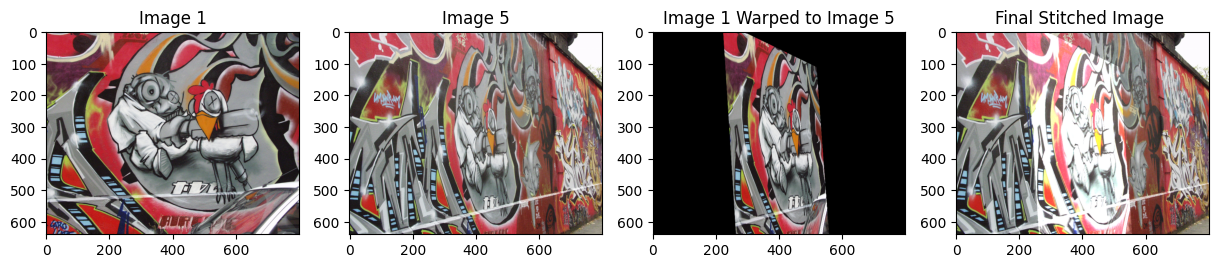

In [47]:
# Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the images
img2, img3, img4, img1, img5 = cv.imread("img2.ppm"), cv.imread("img3.ppm"), cv.imread("img4.ppm"), cv.imread("img1.ppm"), cv.imread("img5.ppm")

# Convert images to grayscale
im1, im5, im2, im3, im4 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY), cv.cvtColor(img5, cv.COLOR_BGR2GRAY), cv.cvtColor(img2, cv.COLOR_BGR2GRAY), cv.cvtColor(img3, cv.COLOR_BGR2GRAY), cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

# Store grayscale images in a list
ims = [im1, im2, im3, im4, im5]

# Function to generate random numbers
def random_number(n, t):
    l = np.random.randint(n, size=t)
    m = np.zeros(np.shape(l))
    
    for i in range(len(l)):
        m[i] = np.sum(l==l[i])
    if np.sum(m) == len(m):
        return l
    else:
        return random_number(n,t)

# Function to calculate Homography matrix
def calculate_homography(source_points, target_points):
    # Check if there are at least four points in each list
    if len(source_points) < 4 or len(target_points) < 4:
        return None  # Return None if there aren't enough points
    
    x1, y1, x2, y2, x3, y3, x4, y4 = target_points[0], target_points[1], target_points[2], target_points[3], target_points[4], target_points[5], target_points[6], target_points[7]
    x1T, x2T, x3T, x4T = source_points[0], source_points[1], source_points[2], source_points[3]
    zero_matrix = np.array([[0], [0], [0]])

    matrix = np.concatenate(
        (np.concatenate((zero_matrix.T, x1T, -y1 * x1T), axis=1), np.concatenate((x1T, zero_matrix.T, -x1 * x1T), axis=1),
         np.concatenate((zero_matrix.T, x2T, -y2 * x2T), axis=1), np.concatenate((x2T, zero_matrix.T, -x2 * x2T), axis=1),
         np.concatenate((zero_matrix.T, x3T, -y3 * x3T), axis=1), np.concatenate((x3T, zero_matrix.T, -x3 * x3T), axis=1),
         np.concatenate((zero_matrix.T, x4T, -y4 * x4T), axis=1), np.concatenate((x4T, zero_matrix.T, -x4 * x4T), axis=1)),
        axis=0, dtype=np.float64)

    W, v = np.linalg.eig((matrix.T) @ matrix)
    temph = v[:, np.argmin(W)]
    H = temph.reshape((3, 3))
    return H

# Parameters for RANSAC
p, s, e = 0.99, 4, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))
Hs = []

# Loop through pairs of consecutive images
for i in range(4):
    sift = cv.SIFT_create()
    key_points_1, descriptors_1 = sift.detectAndCompute(ims[i], None)  # SIFT feature detection
    key_points_2, descriptors_2 = sift.detectAndCompute(ims[i+1], None)
    bf_match = cv.BFMatcher(cv.NORM_L1, crossCheck=True)  # Feature matching
    matches = sorted(bf_match.match(descriptors_1, descriptors_2), key=lambda x: x.distance)

    Source_Points = [key_points_1[k.queryIdx].pt for k in matches]
    Destination_Points = [key_points_2[k.trainIdx].pt for k in matches]
    threshold, best_inliers, best_H = 2, 0, 0

    for i in range(N):
        ran_points = random_number(len(Source_Points)-1, 4)
        f_points = []
        for j in range(4):
            f_points.append(np.array([[Source_Points[ran_points[j]][0], Source_Points[ran_points[j]][1], 1]]))

        t_points = []
        for j in range(4):
            t_points.append(Destination_Points[ran_points[j]][0]) 
            t_points.append(Destination_Points[ran_points[j]][1])

        H = calculate_homography(f_points, t_points)
        
        inliers = 0 
        for k in range(len(Source_Points)):
            X = [Source_Points[k][0], Source_Points[k][1], 1]
            HX = H @ X
            HX /= HX[-1]
            err = np.sqrt(np.power(HX[0]-Destination_Points[k][0], 2) + np.power(HX[1]-Destination_Points[k][1], 2))
            if err < threshold:
                inliers += 1
        if inliers > best_inliers:
            best_inliers = inliers
            best_H = H 
    Hs.append(best_H)

# Combine homographies
H1_H5 = Hs[3] @ Hs[2] @ Hs[1] @ Hs[0]
H1_H5 /= H1_H5[-1][-1]

print("Computed Homography Array = ", H1_H5)
print("Provided Homography Array= ", open("H1to5p", 'r').read())

# Warp and stitch images
transformed_image = cv.warpPerspective(img1, H1_H5, (np.shape(img5)[1], np.shape(img5)[0]))
final_stitched_image = cv.add(img5, transformed_image)

# Display images with new names
fig, ax = plt.subplots(1, 4, figsize=(15, 15))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[0].set_title("Image 1")
ax[1].imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))
ax[1].set_title("Image 5")
ax[2].imshow(cv.cvtColor(transformed_image, cv.COLOR_BGR2RGB))
ax[2].set_title("Image 1 Warped to Image 5")
ax[3].imshow(cv.cvtColor(final_stitched_image, cv.COLOR_BGR2RGB))
ax[3].set_title("Final Stitched Image ")
plt.show()


**Generation of a Noisy Point Set Conforming to a Line and a Circle**

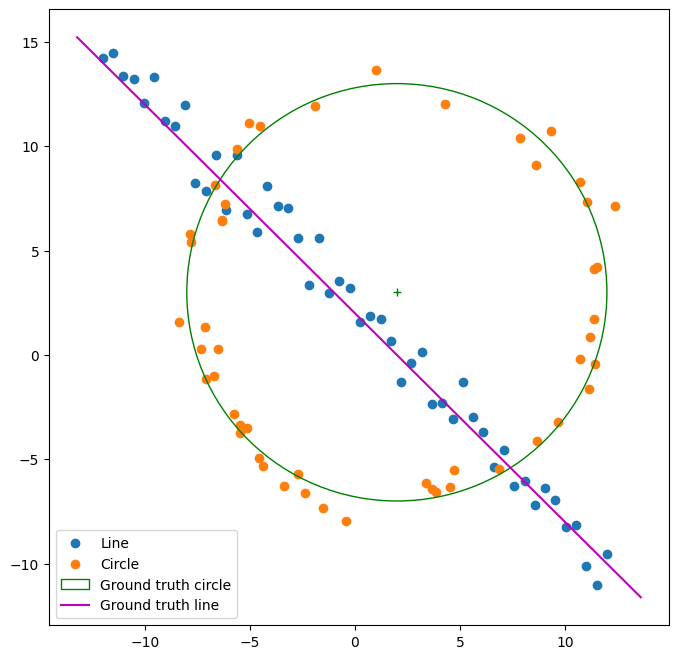

In [204]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import tikzplotlib

# Set the random seed for reproducibility
np.random.seed(0)

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))  # All points

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')
plt.legend()

# Save the plot as an image file
plt.savefig("plot.png")

# Show the plot
plt.show()


**Visualizing Line and Circle Estimation Results**

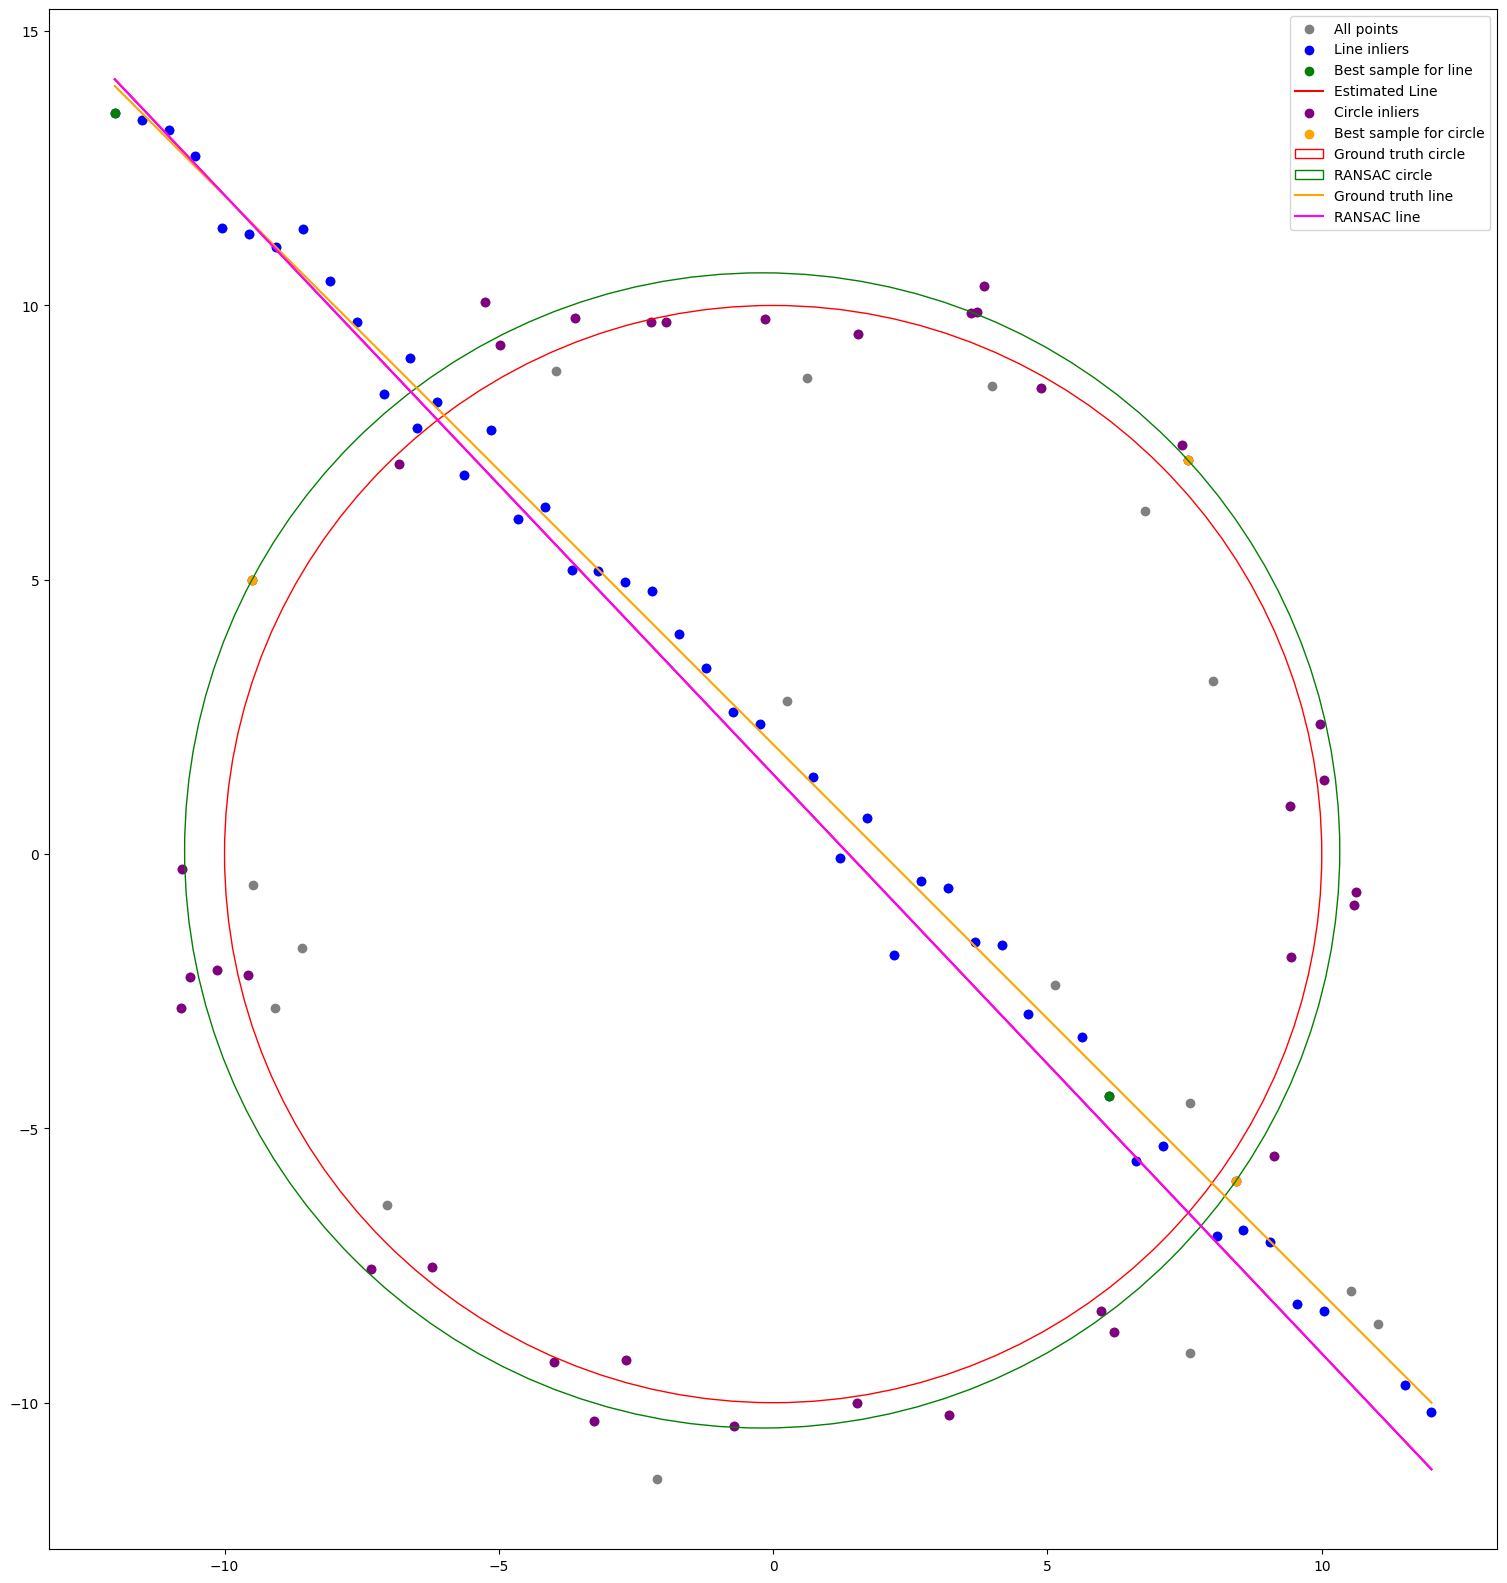

In [6]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import random

# Generate the noisy point set
N = 100
half_n = N // 2
r = 10
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = (r + n) * np.cos(t), (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

def RANSAC_line(Data_set, No_of_iterations, t):
    max_inlier_count = 0
    best_fit_line_params = []
    best_sample_points = []
    line_inliers = []

    for sample in range(0, No_of_iterations + 1):
        point1, point2 = random.randint(0, len(Data_set) - 1), random.randint(0, len(Data_set) - 1)
        while point1 == point2:  # Ensure distinct points
            point2 = random.randint(0, len(Data_set) - 1)
        x1, x2 = Data_set[point1][0], Data_set[point2][0]
        y1, y2 = Data_set[point1][1], Data_set[point2][1]

        # Fit a line using Total Least Squares (TLS)
        A = np.array([[x1, y1], [x2, y2]])
        _, _, V = linalg.svd(A)
        line_params = V.T[:, -1]
        line_params /= np.linalg.norm(line_params[:2])

        inlier_count = 0
        current_line_inliers = []
        for i in range(0, len(Data_set)):
            # Calculate the normal distance to the estimated line
            d = abs(Data_set[i][0] * line_params[0] + Data_set[i][1] * line_params[1] - 1)
            if d < t:
                inlier_count += 1
                current_line_inliers.append(Data_set[i])

        if inlier_count > max_inlier_count:
            max_inlier_count = inlier_count
            best_fit_line_params = line_params
            best_sample_points = np.array([Data_set[point1], Data_set[point2]])
            line_inliers = current_line_inliers

    return best_fit_line_params, best_sample_points, max_inlier_count, line_inliers

def RANSAC_circle(Data_set, No_of_iterations, t):
    max_inlier_count = 0
    best_fit_circle_coefficient = []
    best_sample_points = []
    circle_inliers = []

    for sample in range(0, No_of_iterations + 1):
        point1, point2, point3 = random.sample(range(len(Data_set)), 3)
        x1, x2, x3 = Data_set[point1][0], Data_set[point2][0], Data_set[point3][0]
        y1, y2, y3 = Data_set[point1][1], Data_set[point2][1], Data_set[point3][1]

        P = np.array([[2 * x1, 2 * y1, 1], [2 * x2, 2 * y2, 1], [2 * x3, 2 * y3, 1]])
        if np.linalg.det(P) == 0:
            continue
        K = np.array([[x1 ** 2 + y1 ** 2], [x2 ** 2 + y2 ** 2], [x3 ** 2 + y3 ** 2]]) * (-1)
        answer = np.linalg.inv(P) @ K
        g, f, c = answer[0][0], answer[1][0], answer[2][0]
        radius = np.sqrt(g ** 2 + f ** 2 - c)
        if radius > 20:
            continue
        center = [-g, -f]

        inlier_count = 0
        current_circle_inliers = []
        for i in range(0, len(Data_set)):
            distance = abs(np.sqrt((Data_set[i][0] - center[0]) ** 2 + (Data_set[i][1] - center[1]) ** 2) - radius)
            if distance < t:
                inlier_count += 1
                current_circle_inliers.append(Data_set[i])

        if inlier_count > max_inlier_count:
            max_inlier_count = inlier_count
            best_fit_circle_coefficient = [g, f, c]
            best_sample_points = np.array([Data_set[point1], Data_set[point2], Data_set[point3]])
            circle_inliers = current_circle_inliers

    return best_fit_circle_coefficient, best_sample_points, max_inlier_count, circle_inliers

# Define parameters for line and circle estimation
s_line, t_line, e_line, p_line = 3, 1, 0.5, 0.99
s_circle, t_circle, e_circle, p_circle = 3, 1, 0.5, 0.99

# Estimate the best line using RANSAC
No_of_iterations_line = int(np.log(1 - p_line) / np.log(1 - (1 - e_line) ** s_line))
best_line_params, best_sample_line, best_inlier_count_line, line_inliers = RANSAC_line(X, No_of_iterations_line, t_line)

# Subtract line inliers from the dataset
X_reduced = np.array([point for point in X if abs(point[0] * best_line_params[0] + point[1] * best_line_params[1] - 1) > t_line])

# Estimate the best circle using RANSAC on the reduced dataset
No_of_iterations_circle = int(np.log(1 - p_circle) / np.log(1 - (1 - e_circle) ** s_circle))
best_circle_coeff, best_sample_circle, best_inlier_count_circle, circle_inliers = RANSAC_circle(X_reduced, No_of_iterations_circle, t_circle)

# Plotting
figure, ax = plt.subplots(1, figsize=(20, 20))

# Plot the noisy point set
ax.scatter(X[:, 0], X[:, 1], color="gray", label="All points")

# Plot the line inliers
ax.scatter([p[0] for p in line_inliers], [p[1] for p in line_inliers], color="blue", label="Line inliers")

# Plot the best sample for the line
ax.scatter(best_sample_line[:, 0], best_sample_line[:, 1], color="green", label="Best sample for line")
x = np.linspace(-12, 12, half_n)
y = -(best_line_params[0] / best_line_params[1]) * x + (1 / best_line_params[1])
ax.plot(x, y, color="red", label="Estimated Line")

# Plot the circle inliers
ax.scatter([p[0] for p in circle_inliers], [p[1] for p in circle_inliers], color="purple", label="Circle inliers")

# Plot the best sample for the circle
ax.scatter(best_sample_circle[:, 0], best_sample_circle[:, 1], color="orange", label="Best sample for circle")

# Define the ground truth circle parameters (modify as needed)
ground_truth_circle_params = [0, 0, r]

# Plot the ground truth circle
ground_truth_circle = plt.Circle((-ground_truth_circle_params[0], -ground_truth_circle_params[1]), ground_truth_circle_params[2], fill=False, color="red", label="Ground truth circle")
ax.add_artist(ground_truth_circle)

# Plot the RANSAC circle
ransac_circle = plt.Circle((-best_circle_coeff[0], -best_circle_coeff[1]), np.sqrt(best_circle_coeff[0] ** 2 + best_circle_coeff[1] ** 2 - best_circle_coeff[2]), fill=False, color="green", label="RANSAC circle")
ax.add_artist(ransac_circle)

# Define the ground truth line parameters (modify as needed)
ground_truth_line_params = [m, -1, b]

# Plot the ground truth line
ground_truth_line_x = np.linspace(-12, 12, half_n)
ground_truth_line_y = -(ground_truth_line_params[0] / ground_truth_line_params[1]) * ground_truth_line_x - (ground_truth_line_params[2] / ground_truth_line_params[1])
ax.plot(ground_truth_line_x, ground_truth_line_y, color="orange", label="Ground truth line")

# Plot the RANSAC line
ransac_line_x = np.linspace(-12, 12, half_n)
ransac_line_y = -(best_line_params[0] / best_line_params[1]) * ransac_line_x + (1 / best_line_params[1])
ax.plot(ransac_line_x, ransac_line_y, color="magenta", label="RANSAC line")

# Add legends and set plot aspect ratio
ax.legend()
ax.set_aspect(1)

# Save the plot
plt.savefig("ransac_result.png")
plt.show()


**Impact of Fitting the Circle First**

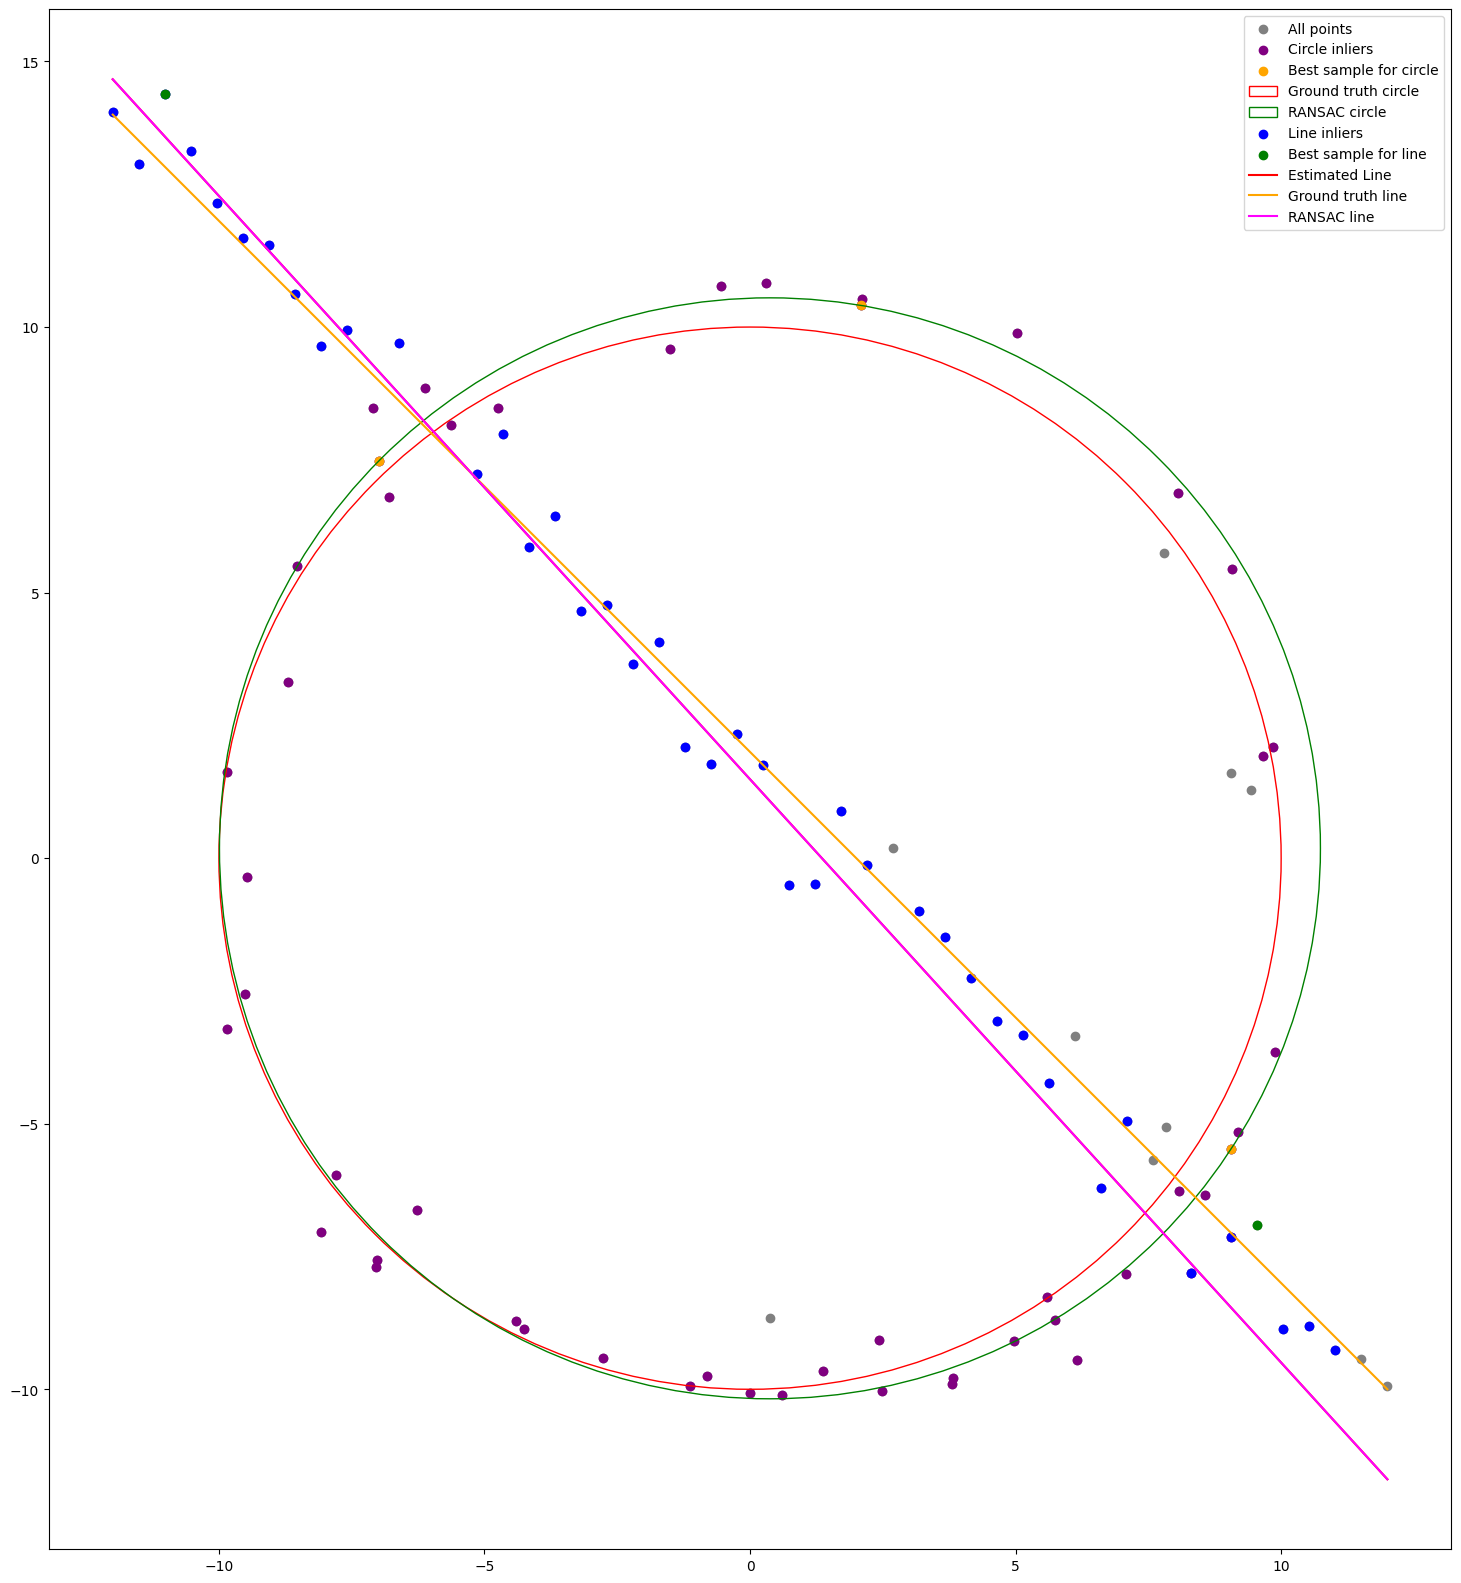

In [5]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import random

# Generate the noisy point set
N = 100
half_n = N // 2
r = 10
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = (r + n) * np.cos(t), (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

def RANSAC_line(Data_set, No_of_iterations, t):
    max_inlier_count = 0
    best_fit_line_params = []
    best_sample_points = []
    line_inliers = []

    for sample in range(0, No_of_iterations + 1):
        point1, point2 = random.randint(0, len(Data_set) - 1), random.randint(0, len(Data_set) - 1)
        while point1 == point2:  # Ensure distinct points
            point2 = random.randint(0, len(Data_set) - 1)
        x1, x2 = Data_set[point1][0], Data_set[point2][0]
        y1, y2 = Data_set[point1][1], Data_set[point2][1]

        # Fit a line using Total Least Squares (TLS)
        A = np.array([[x1, y1], [x2, y2]])
        _, _, V = linalg.svd(A)
        line_params = V.T[:, -1]
        line_params /= np.linalg.norm(line_params[:2])

        inlier_count = 0
        current_line_inliers = []
        for i in range(0, len(Data_set)):
            # Calculate the normal distance to the estimated line
            d = abs(Data_set[i][0] * line_params[0] + Data_set[i][1] * line_params[1] - 1)
            if d < t:
                inlier_count += 1
                current_line_inliers.append(Data_set[i])

        if inlier_count > max_inlier_count:
            max_inlier_count = inlier_count
            best_fit_line_params = line_params
            best_sample_points = np.array([Data_set[point1], Data_set[point2]])
            line_inliers = current_line_inliers

    return best_fit_line_params, best_sample_points, max_inlier_count, line_inliers

def RANSAC_circle(Data_set, No_of_iterations, t):
    max_inlier_count = 0
    best_fit_circle_coefficient = []
    best_sample_points = []
    circle_inliers = []

    for sample in range(0, No_of_iterations + 1):
        point1, point2, point3 = random.sample(range(len(Data_set)), 3)
        x1, x2, x3 = Data_set[point1][0], Data_set[point2][0], Data_set[point3][0]
        y1, y2, y3 = Data_set[point1][1], Data_set[point2][1], Data_set[point3][1]

        P = np.array([[2 * x1, 2 * y1, 1], [2 * x2, 2 * y2, 1], [2 * x3, 2 * y3, 1]])
        if np.linalg.det(P) == 0:
            continue
        K = np.array([[x1 ** 2 + y1 ** 2], [x2 ** 2 + y2 ** 2], [x3 ** 2 + y3 ** 2]]) * (-1)
        answer = np.linalg.inv(P) @ K
        g, f, c = answer[0][0], answer[1][0], answer[2][0]
        radius = np.sqrt(g ** 2 + f ** 2 - c)
        if radius > 20:
            continue
        center = [-g, -f]

        inlier_count = 0
        current_circle_inliers = []
        for i in range(0, len(Data_set)):
            distance = abs(np.sqrt((Data_set[i][0] - center[0]) ** 2 + (Data_set[i][1] - center[1]) ** 2) - radius)
            if distance < t:
                inlier_count += 1
                current_circle_inliers.append(Data_set[i])

        if inlier_count > max_inlier_count:
            max_inlier_count = inlier_count
            best_fit_circle_coefficient = [g, f, c]
            best_sample_points = np.array([Data_set[point1], Data_set[point2], Data_set[point3]])
            circle_inliers = current_circle_inliers

    return best_fit_circle_coefficient, best_sample_points, max_inlier_count, circle_inliers

# Define parameters for line and circle estimation
s_line, t_line, e_line, p_line = 3, 1, 0.5, 0.99
s_circle, t_circle, e_circle, p_circle = 3, 1, 0.5, 0.99

# Estimate the best circle using RANSAC
No_of_iterations_circle = int(np.log(1 - p_circle) / np.log(1 - (1 - e_circle) ** s_circle))
best_circle_coeff, best_sample_circle, best_inlier_count_circle, circle_inliers = RANSAC_circle(X, No_of_iterations_circle, t_circle)

# Subtract circle inliers from the dataset
X_reduced = np.array([point for point in X if abs(np.sqrt((point[0] - best_circle_coeff[0]) ** 2 + (point[1] - best_circle_coeff[1]) ** 2) - np.sqrt(best_circle_coeff[0] ** 2 + best_circle_coeff[1] ** 2 - best_circle_coeff[2])) > t_circle])

# Estimate the best line using RANSAC on the reduced dataset
No_of_iterations_line = int(np.log(1 - p_line) / np.log(1 - (1 - e_line) ** s_line))
best_line_params, best_sample_line, best_inlier_count_line, line_inliers = RANSAC_line(X_reduced, No_of_iterations_line, t_line)

# Plotting
figure, ax = plt.subplots(1, figsize=(20, 20))

# Plot the noisy point set
ax.scatter(X[:, 0], X[:, 1], color="gray", label="All points")

# Plot the circle inliers
ax.scatter([p[0] for p in circle_inliers], [p[1] for p in circle_inliers], color="purple", label="Circle inliers")

# Plot the best sample for the circle
ax.scatter(best_sample_circle[:, 0], best_sample_circle[:, 1], color="orange", label="Best sample for circle")

# Plot the ground truth circle parameters (modify as needed)
ground_truth_circle_params = [0, 0, r]

# Plot the ground truth circle
ground_truth_circle = plt.Circle((-ground_truth_circle_params[0], -ground_truth_circle_params[1]), ground_truth_circle_params[2], fill=False, color="red", label="Ground truth circle")
ax.add_artist(ground_truth_circle)

# Plot the RANSAC circle
ransac_circle = plt.Circle((-best_circle_coeff[0], -best_circle_coeff[1]), np.sqrt(best_circle_coeff[0] ** 2 + best_circle_coeff[1] ** 2 - best_circle_coeff[2]), fill=False, color="green", label="RANSAC circle")
ax.add_artist(ransac_circle)

# Plot the line inliers
ax.scatter([p[0] for p in line_inliers], [p[1] for p in line_inliers], color="blue", label="Line inliers")

# Plot the best sample for the line
ax.scatter(best_sample_line[:, 0], best_sample_line[:, 1], color="green", label="Best sample for line")
x = np.linspace(-12, 12, half_n)
y = -(best_line_params[0] / best_line_params[1]) * x + (1 / best_line_params[1])
ax.plot(x, y, color="red", label="Estimated Line")

# Define the ground truth line parameters (modify as needed)
ground_truth_line_params = [m, -1, b]

# Plot the ground truth line
ground_truth_line_x = np.linspace(-12, 12, half_n)
ground_truth_line_y = -(ground_truth_line_params[0] / ground_truth_line_params[1]) * ground_truth_line_x - (ground_truth_line_params[2] / ground_truth_line_params[1])
ax.plot(ground_truth_line_x, ground_truth_line_y, color="orange", label="Ground truth line")

# Plot the RANSAC line
ransac_line_x = np.linspace(-12, 12, half_n)
ransac_line_y = -(best_line_params[0] / best_line_params[1]) * ransac_line_x + (1 / best_line_params[1])
ax.plot(ransac_line_x, ransac_line_y, color="magenta", label="RANSAC line")

# Add legends and set plot aspect ratio
ax.legend()
ax.set_aspect(1)

# Save the plot
plt.savefig("ransac_result_circle_first.png")
plt.show()
